載入套件與匯入資料

In [1]:
# Import Libaries 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# load the data
train_data = pd.read_csv('train.csv')

探索性資料分析(Exploratory Data Analysis)
1. 印出前十筆資料觀察欄位

In [2]:
#Print the first 10 rows of the data
train_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


2. 觀察資料總共有幾列幾欄

In [3]:
# count the number of rows and coloumns in the dataset
train_data.shape

(891, 12)

3. 觀察資料統計資訊

In [4]:
# Get some statistics
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


4. 觀察 891 人最後到底有多少人存活

In [6]:
# Get a count of the number of survivors
train_data['Survived'].value_counts()


0    549
1    342
Name: Survived, dtype: int64

5. 看一下性別存活率

In [7]:
# Look at survival rate by sex
train_data.groupby('Sex')[['Survived']].mean()

,Survived
Sex,
female,0.742038
male,0.188908


6. 性別 + 艙等

In [8]:
#Look at survival rate by sex and class
train_data.pivot_table('Survived',index = 'Sex', columns = 'Pclass')

Pclass,1,2,3
Sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


7. 性別 + 年齡 + 艙等

In [9]:
# Look at survival rate by sex, age and class
age = pd.cut(train_data['Age'],[0, 18, 80])
train_data.pivot_table('Survived',['Sex',age], 'Pclass')

Pclass                  1         2         3
Sex    Age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

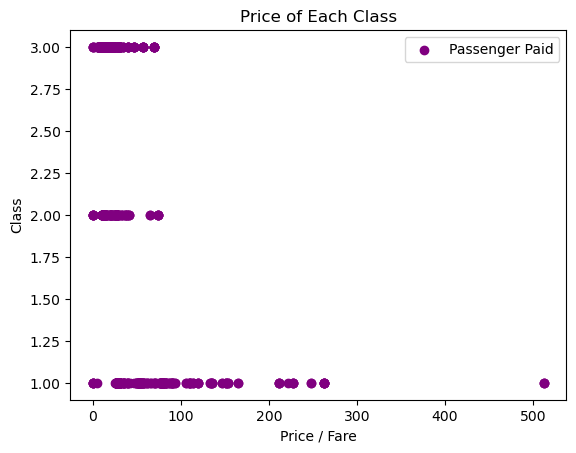

In [10]:
# plot the price paid of each class
plt.scatter(train_data['Fare'],train_data['Pclass'], color = 'purple', label = 'Passenger Paid')
plt.ylabel('Class')
plt.xlabel('Price / Fare')
plt.title('Price of Each Class')
plt.legend()
plt.show()
# someone paid over 500 pounds for fiest class. it looks like every class somebody paid zero pounds looks interesting.

特徵工程
- 資料清理
1. 有無缺失值

In [11]:
# Count the empty values in each column
train_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

2. 進行處裡 以及 把不必要欄位 drop 掉

In [12]:
# Drop the columns
train_data = train_data.drop(['Cabin','Name','PassengerId'], axis=1)
train_data = train_data.drop(['Ticket'] , axis =1 )
# Remove the rows with missing values
train_data = train_data.dropna(subset =  ['Embarked','Age'])

3. 處理完剩下幾列幾欄(特徵)

In [13]:
# Count the new number of rows and columns in the dataset
train_data.shape

(712, 8)

3. 這 8 個欄位(特徵) 資料型態， 因為模型裡只能放入數字型資料

In [14]:
# Look at the data types
train_data.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

4. 觀察'Sex'、'Embarked'有哪些值。

In [15]:
# Print the unique values in the columns
print(train_data['Sex'].unique())
print(train_data['Embarked'].unique())

['male' 'female']
['S' 'C' 'Q']


5. label encoder

In [16]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

# Encode the sex column
train_data.iloc[:, 2] = labelencoder.fit_transform(train_data.iloc[:, 2].values)

# Encode the embarked column
train_data.iloc[:, 7] = labelencoder.fit_transform(train_data.iloc[:, 7].values)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_6740\4291277146.py:5: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  train_data.iloc[:, 2] = labelencoder.fit_transform(train_data.iloc[:, 2].values)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6740\4291277146.py:8: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  train_data.iloc[:, 7] = labelencoder.fit_transform(train_data.iloc[:, 7].values)


In [17]:
# Print the unique values in the columns
print(train_data['Sex'].unique())
print(train_data['Embarked'].unique())

[1 0]
[2 0 1]


In [18]:
train_data.dtypes

Survived      int64
Pclass        int64
Sex           int32
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked      int32
dtype: object

6. 準備一下資料， X 表示我們未來手上會有的資料(乘客資訊) y 為 Survived (船難中是否存活) 。

In [19]:
# Split the data into independent 'X' and dependent 'y' variables
X = train_data.iloc[:, 1:8].values
y = train_data.iloc[:, 0].values

7. 將現有資料 切分 80 % 作為訓練資料集 20 % 為 測試資料集

In [20]:
# Split the dataset into 80% training and 20% testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

資料標準化(standardization)

In [21]:
#Scale the data 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_trian = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

建模
1. 基本分類模型建模 function

In [22]:
# Create a function with many mechaine learning models
def models(X_train, y_train):

    # Use Logistic Regression
    from sklearn.linear_model import LogisticRegression
    log = LogisticRegression(random_state = 0)
    log.fit(X_train, y_train)

    # Use KNeighbors 
    from sklearn.neighbors import KNeighborsClassifier
    knn = KNeighborsClassifier(n_neighbors= 5, metric = 'minkowski', p = 2)
    knn.fit(X_train, y_train)

    # Use SVC (linear kernal)
    from sklearn.svm import SVC
    svc_lin = SVC(kernel='linear', random_state = 0)
    svc_lin.fit(X_train,y_train)

    # Use SVC (RBF kernal)
    from sklearn.svm import SVC
    svc_rbf = SVC(kernel='rbf', random_state = 0)
    svc_rbf.fit(X_train,y_train)

    # Use GaussianNB 
    from sklearn.naive_bayes import GaussianNB
    gauss = GaussianNB()
    gauss.fit(X_train, y_train)

    # Use Dicision Tree
    from sklearn.tree import DecisionTreeClassifier
    tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
    tree.fit(X_train, y_train)

    # Use the RandomForestClassifier
    from sklearn.ensemble import RandomForestClassifier
    forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
    forest.fit(X_train,y_train)
    
    #Print the training accuracy for each model
    print('[0]Logistic Regression Training Accuracy:', log.score(X_train, y_train))
    print('[1]K Neighbors  Training Accuracy:', knn.score(X_train, y_train))
    print('[2]SVC Linear Training Accuracy:', svc_lin.score(X_train, y_train))
    print('[3]SVC RBF Training Accuracy:', svc_rbf.score(X_train, y_train))
    print('[4]Gaussian NB Training Accuracy:', gauss.score(X_train, y_train))
    print('[5]Decision Tree Training Accuracy:', tree.score(X_train, y_train))
    print('[6]Random Forest Training Accuracy:', forest.score(X_train, y_train))
    return log,knn,svc_lin,svc_rbf,gauss,tree,forest

2. 訓練集資料成果

In [23]:
# Get the train all of the models
model = models(X_train, y_train)

c:\Users\Administrator\miniconda3\envs\ML\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[0]Logistic Regression Training Accuracy: 0.8031634446397188
[1]K Neighbors  Training Accuracy: 0.789103690685413
[2]SVC Linear Training Accuracy: 0.7768014059753954
[3]SVC RBF Training Accuracy: 0.6854130052724078
[4]Gaussian NB Training Accuracy: 0.8031634446397188
[5]Decision Tree Training Accuracy: 0.9929701230228472
[6]Random Forest Training Accuracy: 0.9753954305799648


3. 預測測試資料集、混淆矩陣與 Accuracy 分數

In [24]:
# Show the confusion matrix and accuracy for all of the models of the test data
from sklearn.metrics import confusion_matrix

for i in range( len(model) ):
    cm = confusion_matrix(y_test, model[i].predict(X_test))

    # Extract TN, FP, FN, TP
    TN, FP, FN, TP = confusion_matrix(y_test, model[i].predict(X_test)).ravel()
    
    test_score = (TP + TN) / (TN + TP + FP + FN)

    print(cm)
    print('Model[{}] Testing Accuracy = "{}"' .format(i, test_score))
    print()

[[ 0 82]
 [ 0 61]]
Model[0] Testing Accuracy = "0.42657342657342656"

[[ 0 82]
 [ 0 61]]
Model[1] Testing Accuracy = "0.42657342657342656"

[[70 12]
 [18 43]]
Model[2] Testing Accuracy = "0.7902097902097902"

[[82  0]
 [61  0]]
Model[3] Testing Accuracy = "0.5734265734265734"

[[ 3 79]
 [ 0 61]]
Model[4] Testing Accuracy = "0.44755244755244755"

[[70 12]
 [18 43]]
Model[5] Testing Accuracy = "0.7902097902097902"

[[65 17]
 [18 43]]
Model[6] Testing Accuracy = "0.7552447552447552"



重要特徵(欄位)排序

In [26]:
# Get feature impornt 
decisionTree = model[5]
importances = pd.DataFrame({'feature': train_data.iloc[:, 1:8].columns, 'importance': np.round(decisionTree.feature_importances_, 3)} )
importances = importances.sort_values('importance', ascending = False).set_index('feature')
importances



,importance
feature,
Age,0.268
Fare,0.265
Sex,0.216
Pclass,0.136
SibSp,0.067
Embarked,0.032
Parch,0.016


<AxesSubplot:xlabel='feature'>

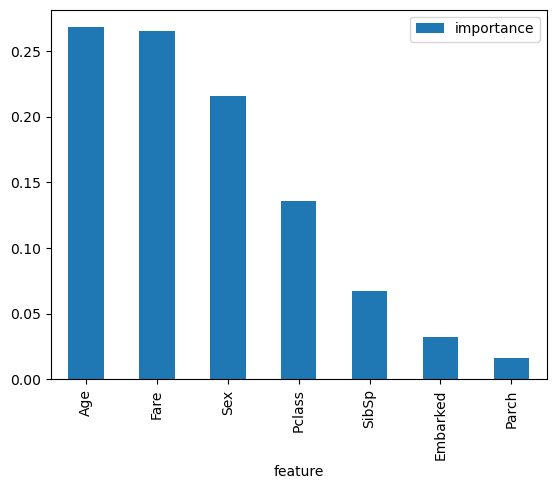

In [27]:
# visualize the importance
importances.plot.bar()
